# Machine Learning-Based Energy Consumption Forecasting in Smart Grids

In [3]:
# Importing Libraries

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC,SVR
import joblib
from feature_engine.outliers import Winsorizer
import os
from sklearn.metrics import mean_squared_error, mean_absolute_error,r2_score
import warnings
warnings.filterwarnings('ignore')

In [5]:
# Importing Dataset

In [6]:
dataset=pd.read_csv("Dataset.csv")

In [7]:
dataset

,DateTime,TemperatureF,Humidity,Hour_y,Minute_y,Day_y,Weekend,Holiday,TotalUsage
0,01-01-2016 00:00,50.0,63.0,0,0,6,0,0,19.843233
1,01-01-2016 01:00,49.8,63.0,1,60,6,0,0,18.462483
2,01-01-2016 02:00,48.9,61.0,2,120,6,0,0,17.414167
3,01-01-2016 03:00,48.6,61.0,3,180,6,0,0,15.914683
4,01-01-2016 04:00,47.7,63.0,4,240,6,0,0,19.195933
...,...,...,...,...,...,...,...,...,...
17412,31-12-2017 01:00,44.2,92.0,1,60,1,1,0,17.104850
17413,31-12-2017 02:00,43.9,89.0,2,120,1,1,0,16.093383
17414,31-12-2017 03:00,43.5,89.0,3,180,1,1,0,16.763400
17415,31-12-2017 04:00,43.3,89.0,4,240,1,1,0,19.573300


In [8]:
dataset.head()

,DateTime,TemperatureF,Humidity,Hour_y,Minute_y,Day_y,Weekend,Holiday,TotalUsage
0,01-01-2016 00:00,50.0,63.0,0,0,6,0,0,19.843233
1,01-01-2016 01:00,49.8,63.0,1,60,6,0,0,18.462483
2,01-01-2016 02:00,48.9,61.0,2,120,6,0,0,17.414167
3,01-01-2016 03:00,48.6,61.0,3,180,6,0,0,15.914683
4,01-01-2016 04:00,47.7,63.0,4,240,6,0,0,19.195933


In [9]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17417 entries, 0 to 17416
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   DateTime      17417 non-null  object 
 1   TemperatureF  17417 non-null  float64
 2   Humidity      17417 non-null  float64
 3   Hour_y        17417 non-null  int64  
 4   Minute_y      17417 non-null  int64  
 5   Day_y         17417 non-null  int64  
 6   Weekend       17417 non-null  int64  
 7   Holiday       17417 non-null  int64  
 8   TotalUsage    17417 non-null  float64
dtypes: float64(3), int64(5), object(1)
memory usage: 1.2+ MB


In [10]:
dataset.isnull().sum()

DateTime        0
TemperatureF    0
Humidity        0
Hour_y          0
Minute_y        0
Day_y           0
Weekend         0
Holiday         0
TotalUsage      0
dtype: int64

In [11]:
dataset.describe()

,TemperatureF,Humidity,Hour_y,Minute_y,Day_y,Weekend,Holiday,TotalUsage
count,17417.000000,17417.000000,17417.000000,17417.000000,17417.000000,17417.000000,17417.000000,17417.000000
mean,71.847574,64.294569,11.499110,689.946604,4.001665,0.286444,0.022047,26.567324
std,13.785191,22.070813,6.921471,415.288282,2.002510,0.452112,0.146842,14.387053
min,20.500000,10.000000,0.000000,0.000000,1.000000,0.000000,0.000000,8.109600
25%,63.300000,47.000000,6.000000,360.000000,2.000000,0.000000,0.000000,16.452317
50%,74.100000,67.000000,11.000000,660.000000,4.000000,0.000000,0.000000,21.936300
75%,81.700000,84.000000,17.000000,1020.000000,6.000000,1.000000,0.000000,32.126700
max,102.900000,99.000000,23.000000,1380.000000,7.000000,1.000000,1.000000,87.126800


In [12]:
dataset['DateTime'] = pd.to_datetime(dataset['DateTime'], format='%d-%m-%Y %H:%M')

# Extract date, time, month, hour, minute, and day into separate columns

dataset['Month'] = dataset['DateTime'].dt.month
dataset['Hour'] = dataset['DateTime'].dt.hour
dataset['Minute'] = dataset['DateTime'].dt.minute
dataset['Day'] = dataset['DateTime'].dt.day
dataset['Year'] = dataset['DateTime'].dt.year

# Drop the original "DateTime" column if not needed anymore
dataset.drop(columns=['DateTime'], inplace=True)

In [13]:
dataset

,TemperatureF,Humidity,Hour_y,Minute_y,Day_y,Weekend,Holiday,TotalUsage,Month,Hour,Minute,Day,Year
0,50.0,63.0,0,0,6,0,0,19.843233,1,0,0,1,2016
1,49.8,63.0,1,60,6,0,0,18.462483,1,1,0,1,2016
2,48.9,61.0,2,120,6,0,0,17.414167,1,2,0,1,2016
3,48.6,61.0,3,180,6,0,0,15.914683,1,3,0,1,2016
4,47.7,63.0,4,240,6,0,0,19.195933,1,4,0,1,2016
...,...,...,...,...,...,...,...,...,...,...,...,...,...
17412,44.2,92.0,1,60,1,1,0,17.104850,12,1,0,31,2017
17413,43.9,89.0,2,120,1,1,0,16.093383,12,2,0,31,2017
17414,43.5,89.0,3,180,1,1,0,16.763400,12,3,0,31,2017
17415,43.3,89.0,4,240,1,1,0,19.573300,12,4,0,31,2017


In [14]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17417 entries, 0 to 17416
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   TemperatureF  17417 non-null  float64
 1   Humidity      17417 non-null  float64
 2   Hour_y        17417 non-null  int64  
 3   Minute_y      17417 non-null  int64  
 4   Day_y         17417 non-null  int64  
 5   Weekend       17417 non-null  int64  
 6   Holiday       17417 non-null  int64  
 7   TotalUsage    17417 non-null  float64
 8   Month         17417 non-null  int64  
 9   Hour          17417 non-null  int64  
 10  Minute        17417 non-null  int64  
 11  Day           17417 non-null  int64  
 12  Year          17417 non-null  int64  
dtypes: float64(3), int64(10)
memory usage: 1.7 MB


In [15]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif


In [16]:
#checking outliers

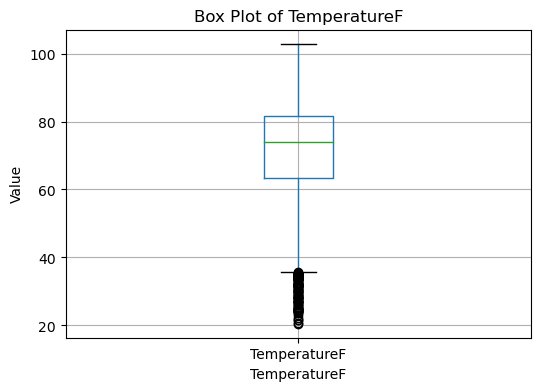

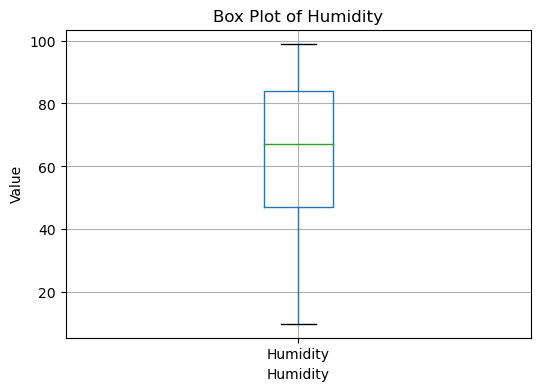

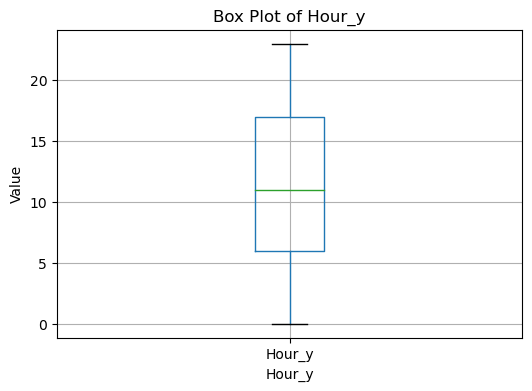

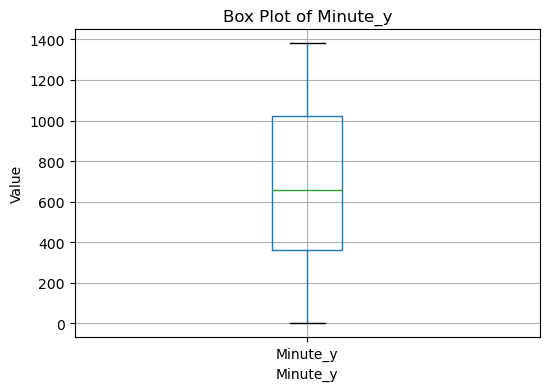

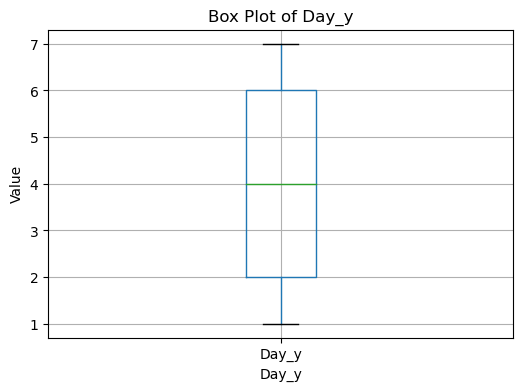

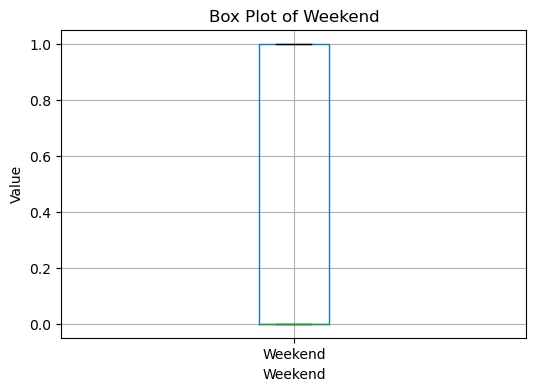

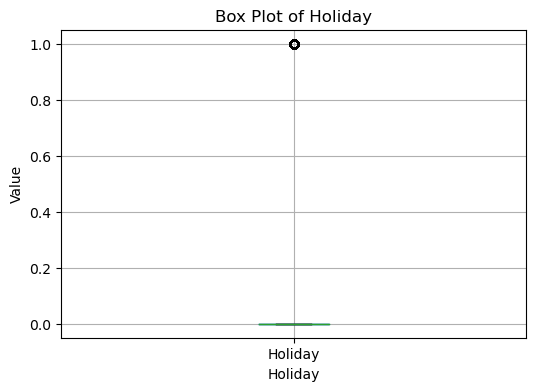

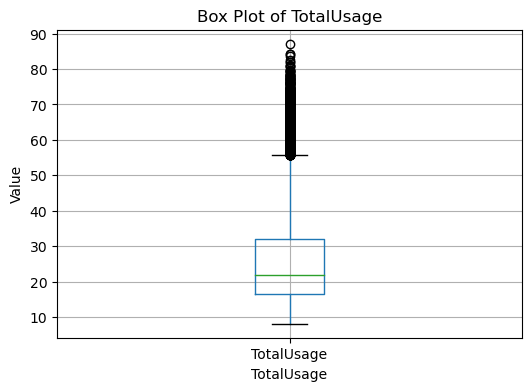

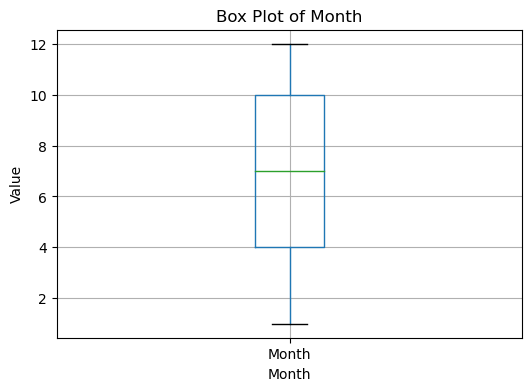

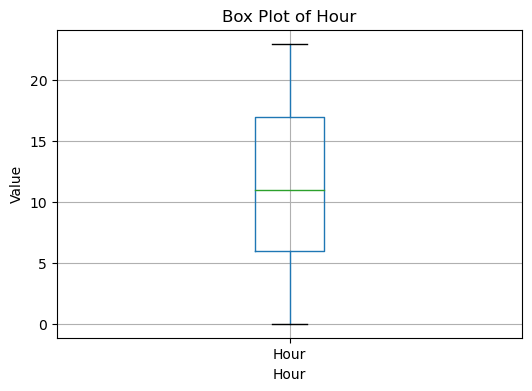

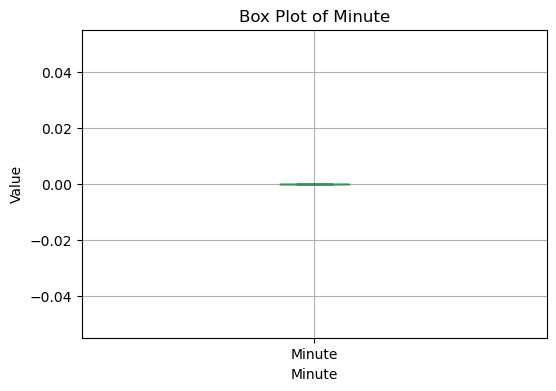

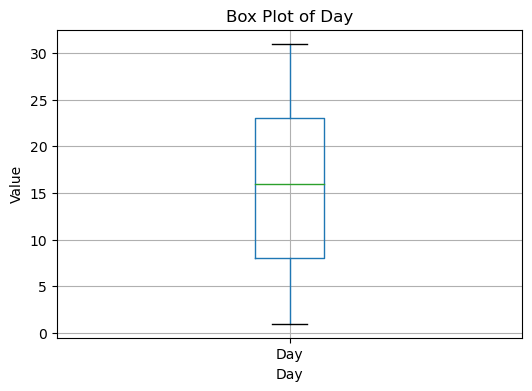

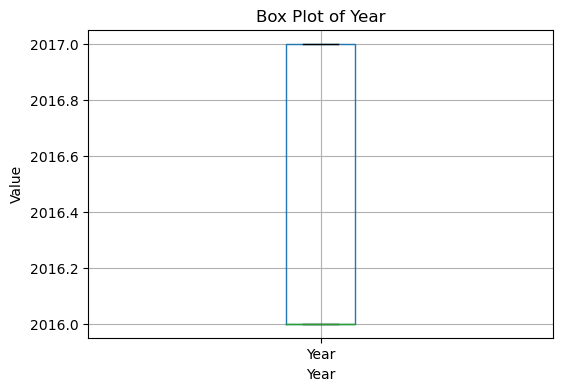

In [17]:
for column in dataset.columns:
    plt.figure(figsize=(6, 4))
    dataset.boxplot(column=[column])
    plt.title('Box Plot of {}'.format(column))
    plt.ylabel('Value')
    plt.xlabel('{}'.format(column))
    plt.grid(True)
    plt.show()

In [18]:
#Dealing with outliers

In [19]:
win=Winsorizer(capping_method='iqr',tail='both',fold=1.5)
dataset['TemperatureF']=win.fit_transform(dataset[['TemperatureF']])

In [20]:
dataset

,TemperatureF,Humidity,Hour_y,Minute_y,Day_y,Weekend,Holiday,TotalUsage,Month,Hour,Minute,Day,Year
0,50.0,63.0,0,0,6,0,0,19.843233,1,0,0,1,2016
1,49.8,63.0,1,60,6,0,0,18.462483,1,1,0,1,2016
2,48.9,61.0,2,120,6,0,0,17.414167,1,2,0,1,2016
3,48.6,61.0,3,180,6,0,0,15.914683,1,3,0,1,2016
4,47.7,63.0,4,240,6,0,0,19.195933,1,4,0,1,2016
...,...,...,...,...,...,...,...,...,...,...,...,...,...
17412,44.2,92.0,1,60,1,1,0,17.104850,12,1,0,31,2017
17413,43.9,89.0,2,120,1,1,0,16.093383,12,2,0,31,2017
17414,43.5,89.0,3,180,1,1,0,16.763400,12,3,0,31,2017
17415,43.3,89.0,4,240,1,1,0,19.573300,12,4,0,31,2017


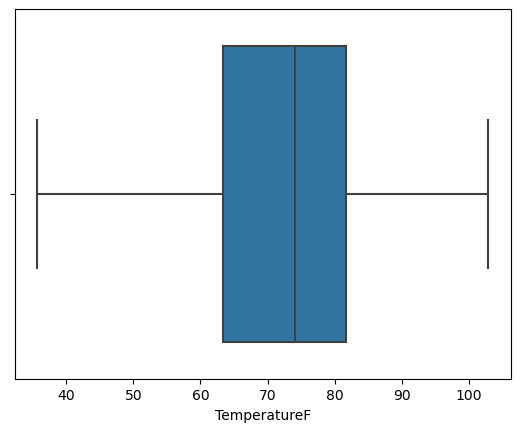

In [21]:
sns.boxplot(x=dataset['TemperatureF'])

In [22]:
#Defining Dependent and independent variables

In [23]:
X=dataset.drop('TotalUsage',axis=1)

In [24]:
X

,TemperatureF,Humidity,Hour_y,Minute_y,Day_y,Weekend,Holiday,Month,Hour,Minute,Day,Year
0,50.0,63.0,0,0,6,0,0,1,0,0,1,2016
1,49.8,63.0,1,60,6,0,0,1,1,0,1,2016
2,48.9,61.0,2,120,6,0,0,1,2,0,1,2016
3,48.6,61.0,3,180,6,0,0,1,3,0,1,2016
4,47.7,63.0,4,240,6,0,0,1,4,0,1,2016
...,...,...,...,...,...,...,...,...,...,...,...,...
17412,44.2,92.0,1,60,1,1,0,12,1,0,31,2017
17413,43.9,89.0,2,120,1,1,0,12,2,0,31,2017
17414,43.5,89.0,3,180,1,1,0,12,3,0,31,2017
17415,43.3,89.0,4,240,1,1,0,12,4,0,31,2017


In [25]:
y=dataset['TotalUsage']

In [26]:
y

0        19.843233
1        18.462483
2        17.414167
3        15.914683
4        19.195933
           ...    
17412    17.104850
17413    16.093383
17414    16.763400
17415    19.573300
17416    18.715617
Name: TotalUsage, Length: 17417, dtype: float64

In [27]:
# Feature slection

In [28]:
selector = SelectKBest(score_func=f_classif, k=10)  # Select top 10 features
X= selector.fit_transform(X, y)

In [29]:
#Datasplitting

In [30]:
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.20,random_state=44)

In [31]:
X_train.shape

(13933, 10)

In [32]:
X_test.shape

(3484, 10)

In [33]:
# Creating a StandardScaler instance
scaler = StandardScaler()

# Fitting the scaler on the training data and transforming both the training and testing data
X_train= scaler.fit_transform(X_train)
X_test= scaler.transform(X_test)

In [34]:
X_train.shape

(13933, 10)

In [35]:
X_test.shape

(3484, 10)

In [36]:
X_train.shape

(13933, 10)

In [37]:
X_test.shape

(3484, 10)

In [38]:
#Building a ML Model

In [39]:
# Define empty lists to store metrics
mse_list = []
mae_list = []
r2_list = []

In [40]:

# Function to calculate various metrics such as accuracy, precision etc
def calculateMetrics(algorithm, predict, testY):
    testY = testY.astype('int')
    predict = predict.astype('int')
    
    mse = mean_squared_error(testY, predict)
    mae = mean_absolute_error(testY, predict)
    r2 = r2_score(testY, predict) * 100
    
    # Append calculated metrics to lists
    mse_list.append(mse)
    mae_list.append(mae)
    r2_list.append(r2)
    
    print(algorithm + ' Mean Squared Error: ' + str(mse))
    print(algorithm + ' Mean Absolute Error: ' + str(mae))
    print(algorithm + ' R^2 Score: ' + str(r2))
    
    # Create a scatter plot
    plt.figure(figsize=(8, 8))
    plt.scatter(predict, testY, color='blue')
    plt.plot([min(testY), max(testY)], [min(testY), max(testY)], linestyle='--', color='red', lw=2)  # Identity line
    # Set labels and title
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    plt.title('Regression Performance')
    plt.show()


#linear regression

Model loaded successfully.
Support Vector Machine Classifier Mean Squared Error: 89.83438576349025
Support Vector Machine Classifier Mean Absolute Error: 7.309127439724454
Support Vector Machine Classifier R^2 Score: 58.25658789093636


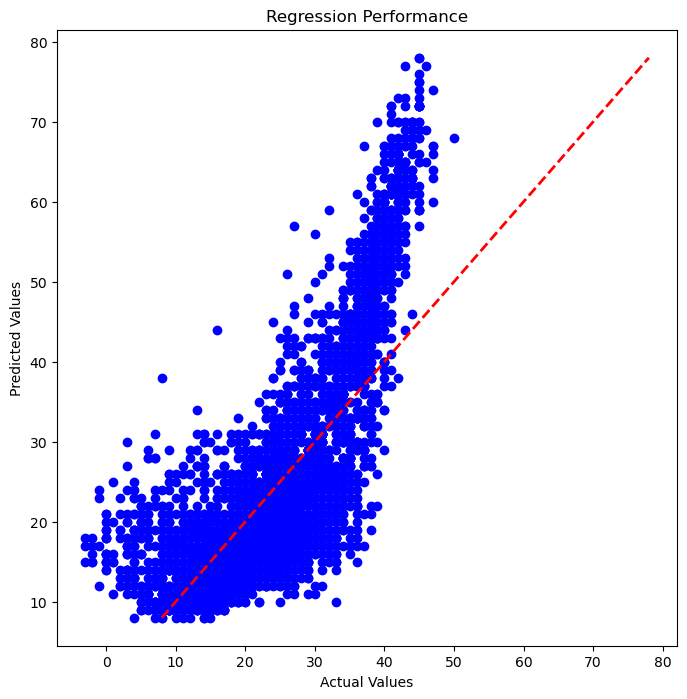

In [41]:
if os.path.exists('SVM_model.pkl'):
    # Load the trained model from the file
    clf = joblib.load('SVM_model.pkl')
    print("Model loaded successfully.")
    predict = clf.predict(X_test)
    calculateMetrics("Support Vector Machine Classifier", predict, y_test)
else:
    # Train the model (assuming X_train and y_train are defined)
    clf = SVR(kernel='linear')
    clf.fit(X_train, y_train)
    # Save the trained model to a file
    joblib.dump(clf, 'SVM_model.pkl')
    print("Model saved successfully.")
    predict = clf.predict(X_test)
    calculateMetrics("Support Vector Machine Regressor", predict, y_test)

#  RandomForestRegressor

Model loaded successfully.
RandomForestRegressor Mean Squared Error: 15.001148105625717
RandomForestRegressor Mean Absolute Error: 2.843857634902411
RandomForestRegressor R^2 Score: 93.02940514191474


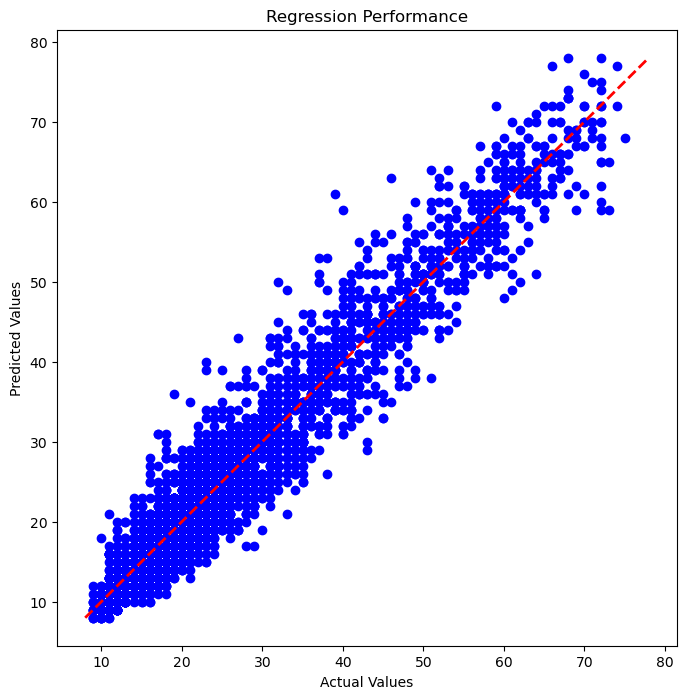

In [42]:
# Check if the model files exist
if os.path.exists('RandomForest_model.pkl'):
    # Load the trained model from the file
    clf = joblib.load('RandomForest_model.pkl')
    print("Model loaded successfully.")
    predict = clf.predict(X_test)
    calculateMetrics("RandomForestRegressor", predict, y_test)
else:
    # Train the model (assuming X_train and y_train are defined)
    clf = RandomForestRegressor()
    clf.fit(X_train, y_train)
    # Save the trained model to a file
    joblib.dump(clf, 'RandomForest_model.pkl') 
    print("Model saved successfuly.")
    predict = clf.predict(X_test)
    calculateMetrics("RandomForestRegressor", predict, y_test)

In [43]:
#showing all algorithms performance values
columns = ["Algorithm Name","r2_list","mse_list","mae_list "]
values = []
algorithm_names = ["Support Vector Machine ", "RandomForestRegressor"]
for i in range(len(algorithm_names)):
    values.append([algorithm_names[i],r2_list[i],mse_list[i],mae_list [i]])
    
temp = pd.DataFrame(values,columns=columns)
temp

,Algorithm Name,r2_list,mse_list,mae_list
0,Support Vector Machine,58.256588,89.834386,7.309127
1,RandomForestRegressor,93.029405,15.001148,2.843858


In [44]:
# prediction

In [45]:
test=pd.read_csv("test.csv")

In [46]:
test

,DateTime,TemperatureF,Humidity,Hour_y,Minute_y,Day_y,Weekend,Holiday
0,01-01-2018 00:00,50.0,63,0,0,6,0,0
1,02-01-2018 00:00,49.8,63,1,60,6,0,0
2,03-01-2018 00:00,48.9,61,2,120,6,0,0
3,04-01-2018 00:00,48.6,61,3,180,6,0,0
4,05-01-2018 00:00,47.7,63,4,240,6,0,0
5,06-01-2018 00:00,46.9,63,5,300,6,0,0
6,07-01-2018 00:00,45.5,66,6,360,6,0,0
7,08-01-2018 00:00,45.1,61,7,420,6,0,0
8,09-01-2018 00:00,44.8,62,8,480,6,0,0
9,10-01-2018 00:00,44.8,59,9,540,6,0,0


In [47]:

test['DateTime'] = pd.to_datetime(test['DateTime'], format='%d-%m-%Y %H:%M')

test['Month'] = test['DateTime'].dt.month
test['Hour'] = test['DateTime'].dt.hour
test['Minute'] = test['DateTime'].dt.minute
test['Day'] = test['DateTime'].dt.day
test['Year'] = test['DateTime'].dt.year

test.drop(columns=['DateTime'], inplace=True)


In [48]:
test1= selector.transform(test)

In [49]:
test2= scaler.transform(test1)

In [50]:
# Make predictions on the selected test data
predictions = clf.predict(test2)

# Loop through each prediction and print the corresponding row and prediction value
for i, prediction in enumerate(predictions):
    print(test.iloc[i])
    print("Row {}: Prediction =======> {}".format(i, prediction))


TemperatureF      50.0
Humidity          63.0
Hour_y             0.0
Minute_y           0.0
Day_y              6.0
Weekend            0.0
Holiday            0.0
Month              1.0
Hour               0.0
Minute             0.0
Day                1.0
Year            2018.0
Name: 0, dtype: float64
Row 0: Prediction =======> 17.269342331229996
TemperatureF      49.8
Humidity          63.0
Hour_y             1.0
Minute_y          60.0
Day_y              6.0
Weekend            0.0
Holiday            0.0
Month              1.0
Hour               0.0
Minute             0.0
Day                2.0
Year            2018.0
Name: 1, dtype: float64
Row 1: Prediction =======> 16.159166664469993
TemperatureF      48.9
Humidity          61.0
Hour_y             2.0
Minute_y         120.0
Day_y              6.0
Weekend            0.0
Holiday            0.0
Month              1.0
Hour               0.0
Minute             0.0
Day                3.0
Year            2018.0
Name: 2, dtype: float64
Row 2: P